# CC 08 (Mathematical Physics - 3) All Codes

> **Differential Equations - Euler, Modified Euler and RK method**

> **Fourier Series**

> **Legendre Polynomials** (by available function, calculations and recurrence formula)

> **Orthogonality of Legendre Polynomials**

> **Bessel Functions** (by available function, calculations and recurrence formula)

> **Complex integrations**

> **Discrete Fourier Transform**

> **Fast Fourier Transform**

> **Dirac Delta Function**

> **Other Questions in the Syllabus**

> **n-th Root of Unity**

> **Square root of Complex numbers**


# Differential Equations

## Euler's Method

$$ \frac{dy}{dx} = f(x,y) $$

For n intervals between the integration limits $(x_0,x)$, 
$$ x_n = x_0 + nh \quad ; (n = 1,2,3,...) $$
By Euler's Formula, 
$$ y_{n+1} = y_n + hf(x_n, y_n) $$

**Algorithm:**

1. Define the function $f(x,y)$.
2. Set interval and initial values of x and y.
3. Update, $$ y = y + hf(x,y) $$  $$ x = x+h $$
    Iterate this in a loop.
4. Collect the (x,y) data.
5. Plot the graph.

**Question:** Plot $x-y$ graph for the differential equation,
$$ \frac{dy}{dx} = x^2 e^{-x/5} $$

**Python Program:**

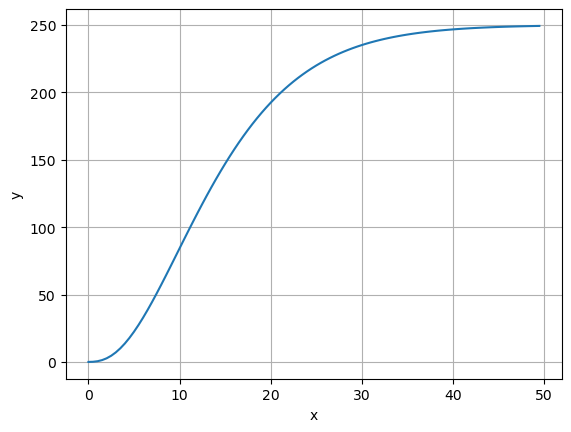

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return x**2 * np.exp(-x/5)

x, y, h = 0, 0, 0.5
xx, yy = [], []

for i in range (100):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
    
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Modified Euler's Method

To get a better approximation by *trapezoidal rule*,
$$ y_{n+1} = y_0 + \frac{h}{2}[f(x_n, y_n) + f(x_{n+1}, y_{n+1})] $$
By applying iteration on this, we can get a better solution.

**Question:** Plot $x-y$ graph for the differential equation,
$$ \frac{dy}{dx} = x^2 e^{-x/5} $$

**Python Program:**

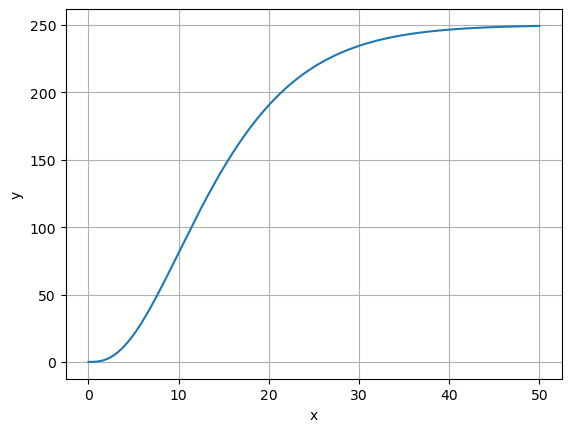

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return x**2 * np.exp(-x/5)
    
xm = 50      # upper limit of x
x, y = 0, 0
h = 0.005
xx, yy = [], []

while abs(x) < abs(xm):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Runge - Kutta Method

Here, the change of y is further modified. Let h and k be the changes in x and y.

$$ k_1 = h f(x,y) $$

$$ k_2 = h f(x + \frac{h}{2}, y + \frac{k_1}{2}) $$

$$ k_3 = h f(x + \frac{h}{2}, y + \frac{k_2}{2}) $$

$$ k_4 = h f(x + h, y + k_3) $$

At last, y should be,
$$ y = y + \frac{1}{6}[k_1 + 2(k_2 + k_3) + k_4] $$

**Question:** Plot $x-y$ graph for the differential equation,
$$ \frac{dy}{dx} = x^2 e^{-x/5} $$

**Python Program:**

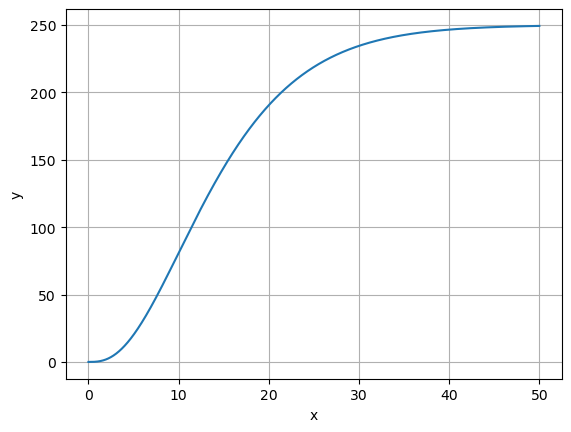

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return x**2 * np.exp(-x/5)
    
xm = 50
x, y = 0, 0
h = 0.005
xx, yy = [], []

while abs(x) < abs(xm):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## 2nd Order Differential Equations

**$$ ay'' + by' + cy = 0 \quad; y'=\frac{dy}{dx} $$**

Let, $$ y' = z \quad.......(1)$$ So, $$ az' + bz + cy = 0 \quad.......(2)$$

**Question:** Plot $x-y$ graph for the differential equation,
$$ y'' -4y' +4y =0 $$

**Python Program:**

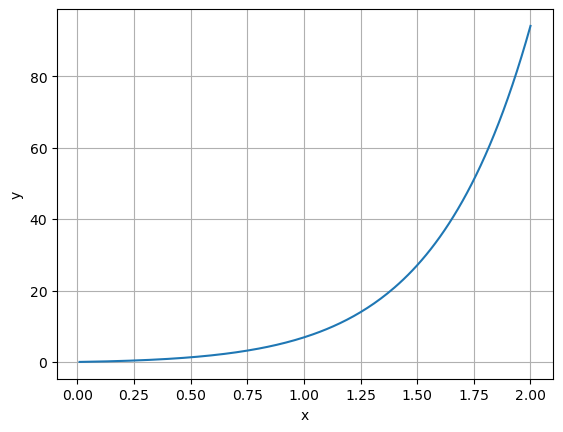

In [4]:
import matplotlib.pyplot as plt

pr = [1,-4,4]   # parameters = [a,b,c]
x,y,z = 0,0,1
xm = 2
dx = 0.01
xx, yy, zz = [], [], []

def dydx(x,y,z):
    return z
def dzdx(x,y,z):
    return (-1/pr[0]) * (pr[1]*z + pr[2]*y)

while abs(x) < abs(xm):
    x = x + dx
    y = y + dx * dydx(x,y,z)
    z = z + dx * dzdx(x,y,z)
    
    xx.append(x)
    yy.append(y)
    zz.append(z)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## 3rd Order ODE

**Question:**  $$ y''' -2y'' -y' +2y = x^2 $$

## Numerical Solution by different methods

In [5]:
from scipy.integrate import odeint, solve_ivp

In [6]:
# Write the differential equation. (dy/dx = yp, d2y/dx2 = ypp)

def dSdx(x,S):
    y, yp, ypp = S
    return [yp, ypp, 2*ypp + yp - 2*y + x**2] 

def dydx(x,y,yp,ypp):
    return yp
def dypdx(x,y,yp,ypp):
    return ypp
def dyppdx(x,y,yp,ypp):
    return 2*ypp + yp - 2*y + x**2

x_0, y_0, yp_0, ypp_0 = 0, 0, 0, 0  # initial conditions
x_min, x_max = x_0, 10     # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

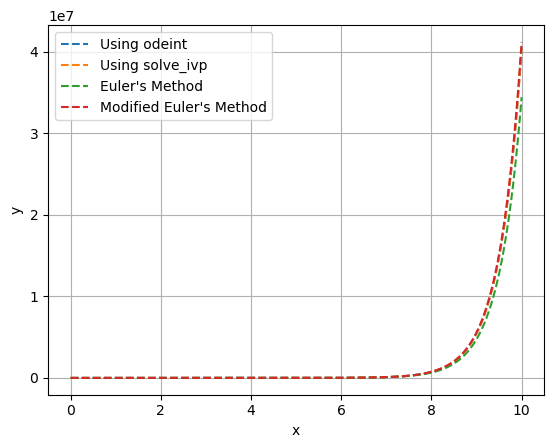

In [7]:
# ALL IN ONE
# Using odeint
y0, yp0, ypp0 = y_0, yp_0, ypp_0
S0 = (y0,yp0,ypp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0, ypp0 = y_0, yp_0, ypp_0
S0 = (y0,yp0,ypp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(sol.t,y1, '--', label='Using solve_ivp')

# Euler's Method
x, y, yp, ypp = x_0, y_0, yp_0, ypp_0
xmax = x_max
h = dx
xx, yy, yyp, yypp = [], [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    yypp.append(ypp)
    x += h
    y += h*dydx(x,y,yp,ypp)
    yp += h*dypdx(x,y,yp,ypp)
    ypp += h*dyppdx(x,y,yp,ypp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp, ypp = x_0, y_0, yp_0, ypp_0
xmax = x_max
h = dx
xx, yy, yyp, yypp = [], [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    yypp.append(ypp)
    x += h
    dy = (h/2) * (dydx(x,y,yp,ypp) + 
dydx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    dyp = (h/2) * (dypdx(x,y,yp,ypp) + 
dypdx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    dypp = (h/2) * (dyppdx(x,y,yp,ypp) + 
dyppdx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    y += dy
    yp += dyp
    ypp += dypp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Problems

### Question-1.1:
$$ \frac{dy}{dx} = e^{-x} $$ 
Initial condition: $y=0$ for $x=0$.

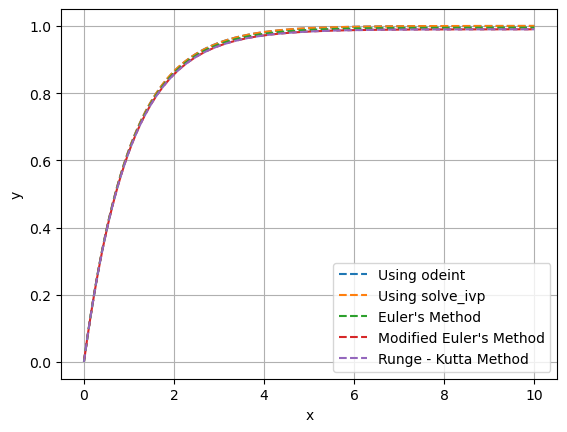

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def dydx(x,y):                   # Write the differential equation.
    return np.exp(-x)

y_0 = 0               # initial condition
x_min, x_max = 0, 10   # lower and upper limit of x

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

x_0, y_0 = 0, 0         # initial condition
x_max = 10            # upper limit of x

# Euler's Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Question-1.2:
$$ \frac{dy}{dx} + e^{-x} = x^2 $$ 
Initial condition: $y=0$ for $x=0$.

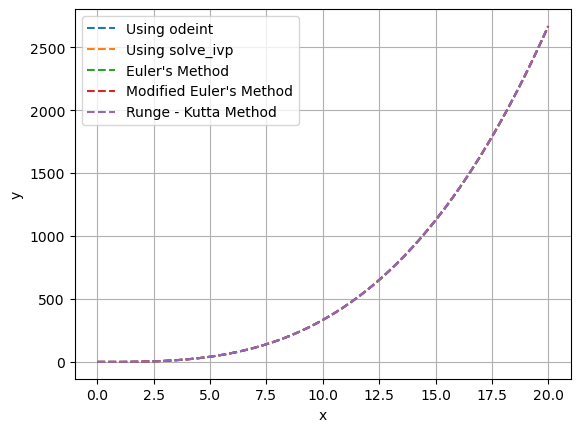

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def dydx(x,y):                   # Write the differential equation.
    return -np.exp(-x) + x**2

y_0 = 0               # initial condition
x_min, x_max = 0, 20   # lower and upper limit of x

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

x_0, y_0 = 0, 0         # initial condition
x_max = 20            # upper limit of x

# Euler's Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = 0.01
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Question-1.3:
$$ \frac{d^2y}{dx^2} + 2\frac{dy}{dx} + y = 0 $$ 
Initial condition: $y=1$ for $x=0$.

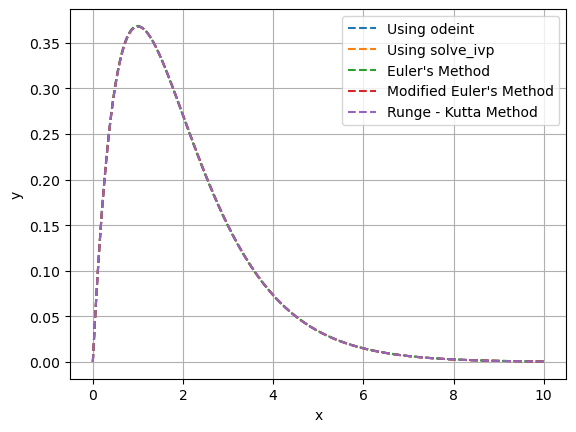

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def dSdx(x,S):        # Write the differential equation. (dy/dx = yp)
    y, yp = S
    return [yp, -2*yp - y] 

def dydx(x,y,yp):   # Write the differential equation. (dy/dx = yp)
    return yp
def dypdx(x,y,yp):
    return -2*yp - y

y_0, yp_0 = 0, 1      # initial condition for y and dy/dx
x_min, x_max = 0, 10   # lower and upper limit of x

# Using odeint
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

x_0, y_0, yp_0 = 0, 0, 1  # initial condition for y and dy/dx
x_max = 10            # upper limit of x

# Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = 0.01
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    y += h*dydx(x,y,yp)
    yp += h*dypdx(x,y,yp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = 0.01
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    dy = (h/2)*(dydx(x,y,yp) + 
dydx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    dyp = (h/2)*(dypdx(x,y,yp) + 
dypdx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    y += dy
    yp += dyp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = 0.01
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y), yyp.append(yp)
    x += h
    k1 = h * dydx(x,y,yp)
    l1 = h * dypdx(x,y, yp)
    k2 = h * dydx(x + (h/2), y + (k1/2), yp + (l1/2))
    l2 = h * dypdx(x + (h/2), y + (k1/2), yp + (l1/2))
    k3 = h * dydx(x * (h/2), y + (k2/2), yp + (l2/2))
    l3 = h * dypdx(x + (h/2), y + (k2/2), yp + (l2/2))
    k4 = h * dydx(x + h, y + k3, yp + l3)
    l4 = h * dypdx(x + h, y + k3, yp + l3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
    yp += (1/6)*(l1 + 2*(l2 + l3) + l4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Fourier Series

## Sawtooth signal

We can call the function from **scipy.signal**. Here an alternative way to create the function is shown.

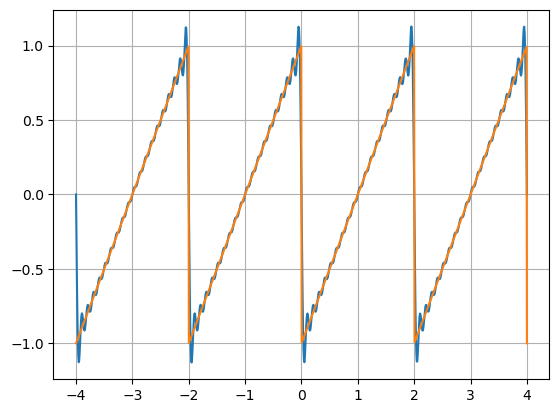

In [11]:
# alternative method for sawtooth signal
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps

L = 1
x = np.linspace(-L,L,1000)  # Full period
xp = 4*x
f = lambda xp: xp%(2*L) - L

a0 = 1.0/L*simps(f(x),x)
an = lambda n: 1.0/L * simps(f(x)*np.cos(n*np.pi*x/L), x)
bn = lambda n: 1.0/L * simps(f(x)*np.sin(n*np.pi*x/L), x)

S = a0/2 + sum([an(n)*np.cos(n*np.pi*xp/L) + 
                bn(n)*np.sin(n*np.pi*xp/L) for  n in range(1,20)])

plt.plot(xp,S,xp,f(xp))
plt.grid()
plt.show()

## Example:
$$ f(x) = e^x \quad ;(0<x<2\pi)$$

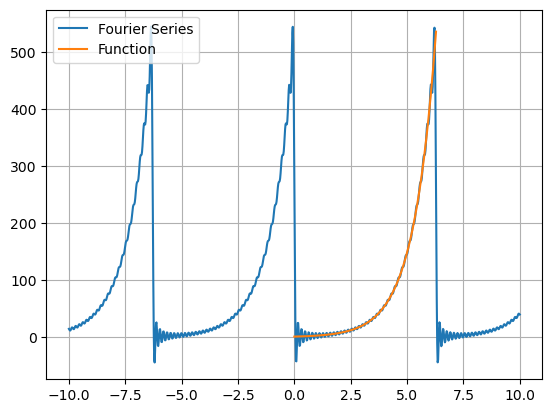

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps

x = np.linspace(0, 2*np.pi, 1000)   # period of x
f = lambda x: np.exp(x)   # function

a0 = 1/np.pi * simps(f(x),x)
an = lambda n: (1/np.pi) * simps(f(x)*np.cos(n*x), x)
bn = lambda n: (1/np.pi) * simps(f(x)*np.sin(n*x), x)

L1, L2 = -10, 10     # length of the signal
N = 40            # no. of terms in Fourier Series
xp = np.linspace(L1,L2,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*xp) + 
                    bn(n)*np.sin(n*xp) for n in range (1,N)])

import matplotlib.pyplot as plt
plt.plot(xp, S, label='Fourier Series')
plt.plot(x, f(x), label='Function')
plt.legend()
plt.grid()
plt.show()

## Step Function

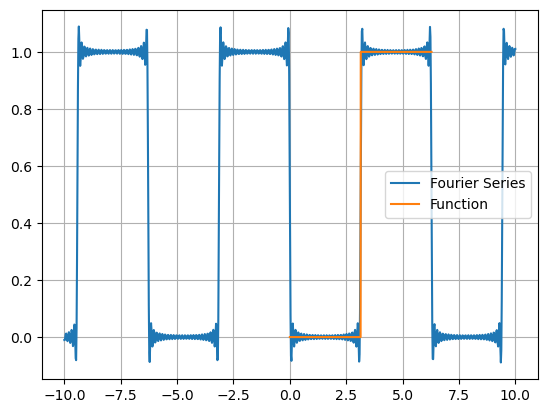

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps

# step function
f = lambda x: np.array([0 if 0<=i<np.pi else 1 for i in x])
x = np.linspace(0, 2*np.pi, 1000)       # period of x

a0 = 1/np.pi * simps(f(x),x)
an = lambda n: (1/np.pi) * simps(f(x)*np.cos(n*x), x)
bn = lambda n: (1/np.pi) * simps(f(x)*np.sin(n*x), x)

L = 10     # length of the signal
N = 50     # no. of terms in Fourier Series
xp = np.linspace(-L,L,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*xp) + 
                    bn(n)*np.sin(n*xp) for n in range (1,N)])

import matplotlib.pyplot as plt
plt.plot(xp, S, label='Fourier Series')
plt.plot(x, f(x), label='Function')
plt.legend()
plt.grid()
plt.show()

## Example:
$$f(x) = 0 \quad; (-1 \leq x < -0.5)$$ 
$$= 1 \quad; (-0.5 \leq x < 0)$$ 
$$= x^2 \quad; (0 \leq x < 1)$$

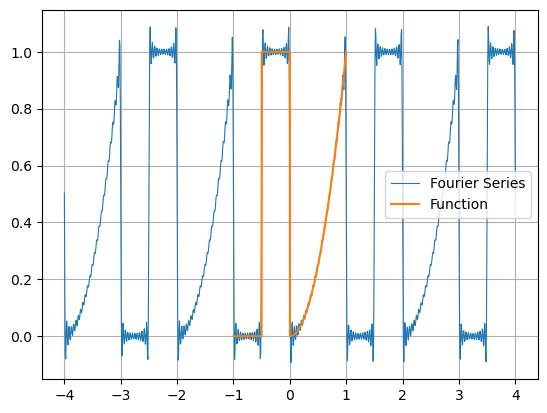

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps

M1, M2 = -1, 1         # period of x
# function
x = np.linspace(M1, M2, 1000)
f = lambda x: np.array([0 if M1<=i<-0.5 
                        else 1 if -0.5<=i<0 else i**2 for i in x])

a0 = 2/(M2-M1) * simps(f(x), x)
an = lambda n: (2/(M2-M1)) * simps(f(x)*np.cos(n*np.pi*x*2/(M2-M1)), x)
bn = lambda n: (2/(M2-M1)) * simps(f(x)*np.sin(n*np.pi*x*2/(M2-M1)), x)

L1, L2 = -4, 4     # length of the signal
N = 50     # no. of terms in Fourier Series
xp = np.linspace(L1,L2,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*np.pi*xp*2/(M2-M1)) + 
                    bn(n)*np.sin(n*np.pi*xp*2/(M2-M1)) for n in range (1,N)])

import matplotlib.pyplot as plt
plt.plot(xp, S, lw=0.8, label='Fourier Series')
plt.plot(x, f(x), label='Function')
plt.legend()
plt.grid()
plt.show()

## Half Wave Rectifier

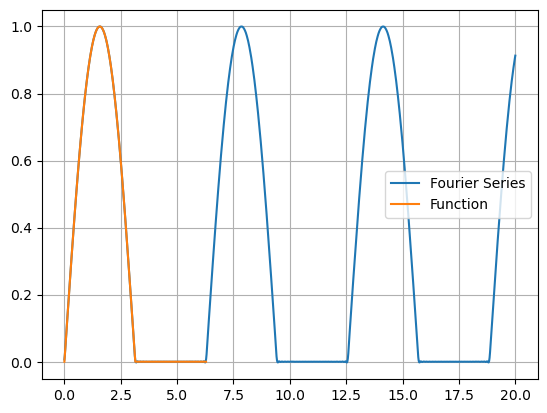

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps

M1, M2 = 0, 2*np.pi         # period of x
# function
x = np.linspace(M1, M2, 1000)
f = lambda x: np.array([np.sin(i) if M1<=i<(M2-M1)/2 
                        else 0 for i in x])

a0 = 2/(M2-M1) * simps(f(x), x)
an = lambda n: (2/(M2-M1)) * simps(f(x)*np.cos(n*np.pi*x*2/(M2-M1)), x)
bn = lambda n: (2/(M2-M1)) * simps(f(x)*np.sin(n*np.pi*x*2/(M2-M1)), x)

L1, L2 = 0, 20     # length of the signal
N = 50     # no. of terms in Fourier Series
xp = np.linspace(L1,L2,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*np.pi*xp*2/(M2-M1)) + 
                    bn(n)*np.sin(n*np.pi*xp*2/(M2-M1)) for n in range (1,N)])

import matplotlib.pyplot as plt
plt.plot(xp, S, label='Fourier Series')
plt.plot(x, f(x), label='Function')
plt.legend()
plt.grid()
plt.show()

## Full Wave Rectifier

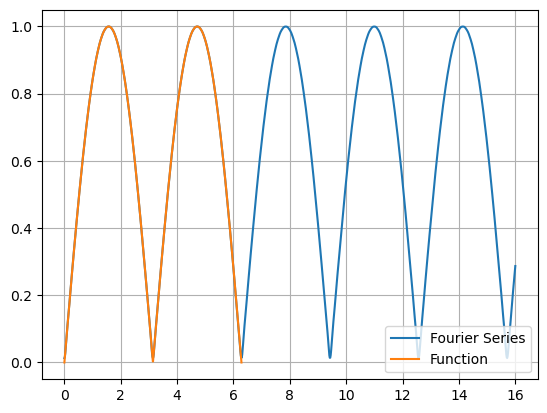

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps

M1, M2 = 0, 2*np.pi         # period of x
# function
x = np.linspace(M1, M2, 1000)
f = lambda x: abs(np.sin(x))

a0 = 2/(M2-M1) * simps(f(x), x)
an = lambda n: (2/(M2-M1)) * simps(f(x)*np.cos(n*np.pi*x*2/(M2-M1)), x)
bn = lambda n: (2/(M2-M1)) * simps(f(x)*np.sin(n*np.pi*x*2/(M2-M1)), x)

L1, L2 = 0, 16     # length of the signal
N = 50     # no. of terms in Fourier Series
xp = np.linspace(L1,L2,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*np.pi*xp*2/(M2-M1)) + 
                    bn(n)*np.sin(n*np.pi*xp*2/(M2-M1)) for n in range (1,N)])

import matplotlib.pyplot as plt
plt.plot(xp, S, label='Fourier Series')
plt.plot(x, f(x), label='Function')
plt.legend()
plt.grid()
plt.show()

## Example:
$$ f(x) = x^2 \quad; (-\pi<x<\pi)$$
By using this series, Riemann Zeta 2 function can be obtained.

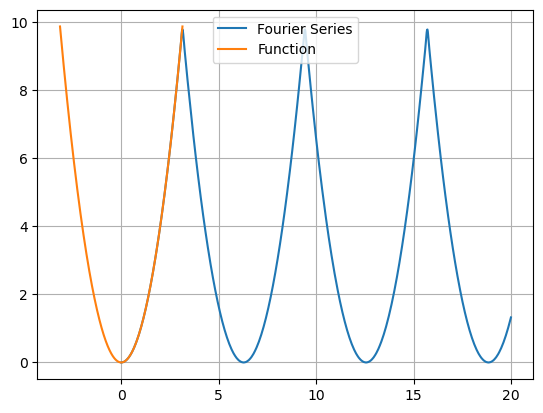

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps

M1, M2 = -np.pi, np.pi         # period of x
# function
x = np.linspace(M1, M2, 1000)
f = lambda x: x**2

a0 = 2/(M2-M1) * simps(f(x), x)
an = lambda n: (2/(M2-M1)) * simps(f(x)*np.cos(n*np.pi*x*2/(M2-M1)), x)
bn = lambda n: (2/(M2-M1)) * simps(f(x)*np.sin(n*np.pi*x*2/(M2-M1)), x)

L1, L2 = 0, 20     # length of the signal
N = 50     # no. of terms in Fourier Series
xp = np.linspace(L1,L2,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*np.pi*xp*2/(M2-M1)) + 
                    bn(n)*np.sin(n*np.pi*xp*2/(M2-M1)) for n in range (1,N)])

import matplotlib.pyplot as plt
plt.plot(xp, S, label='Fourier Series')
plt.plot(x, f(x), label='Function')
plt.legend()
plt.grid()
plt.show()

Similarly, Riemann Zeta 4 function can be obtained by using $f(x) = x^4 \,; (-\pi<x<\pi)$.

## Question-3: Fourier Series of Square Wave

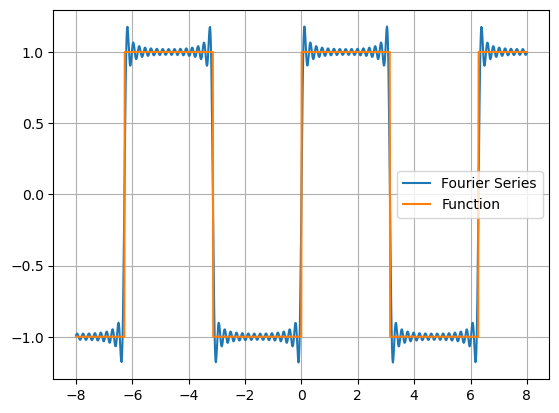

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps 
from scipy.signal import square
import scipy as sp

x = np.linspace(-np.pi, np.pi, 1000)
f = square (x)
a0 = 1/np.pi * simps(f,x)
an = lambda n: 1/np.pi * simps(f*np.cos(n*x), x)
bn = lambda n: 1/np.pi * simps(f*np.sin(n*x), x)

L = 8      # length of the signal 
N = 30     # number of sine and cosine terms
xp = np.linspace(-L,L,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*xp)+ 
                    bn(n)*np.sin(n*xp) for n in range (1,N)])

plt.plot(xp, S, label='Fourier Series')
plt.plot(xp, square(xp), label='Function')
plt.legend()
plt.grid()
plt.show()

# Legendre Polynomials

**Legendre's Differential Equation:** $$ (1-x^2)y'' - 2xy' + n(n+1)y = 0 $$

**Solution (Legendre Polynomials):** $$ P_n(x) = \sum_{k=0}^{m} (-1)^k \frac{(2n-2k)!}{2^n k! (n-k)!(n-2k)!} \, x^{n-2k} $$

For $n=even$, $m=\frac{n}{2}$ and for $n=odd$, $m=\frac{n-1}{2}$.

### from `scipy.special`

In [19]:
from scipy.special import legendre
legendre(3)(5)

305.0

## By calculations

In [20]:
def fact(n):
    fct = 1
    for i in range(2,n+1):
        fct *= i
    return fct

In [21]:
def Pn(n,x):
    trm = 0
    m = n//2  # for both even and odd n
    for k in range(0,m+1):
        trm += (-1)**k*fact(2*n-2*k)*x**(n-2*k)/(2**n*fact(k)*fact(n-k)*fact(n-2*k))
    return trm

In [22]:
Pn(3,5)

305.0

## By recurrence formula

$$ P_n(x) = \frac{2n-1}{n} xP_{n-1}(x) - \frac{n-1}{n} P_{n-2}(x) $$
Given, $P_0(x)=1$ and $P_1(x)=x$.

In [23]:
def recPn(n,x):
    P0 = 1
    P1 = x
    if n==0:
        Pn = P0
    elif n==1:
        Pn = P1
    else:
        Pn_1, Pn_2 = P1, P0
    for i in range(2,n+1):
        Pn = (2*i-1)/i*x*Pn_1 - (i-1)/i*Pn_2
        Pn_1, Pn_2 = Pn, Pn_1
    return Pn

In [24]:
recPn(3,5)

305.00000000000006

**Verification**

In [25]:
n1, x1 = 5,-1.5  # input values
print('by using function in scipy.special\n\t',legendre(n1)(x1))
print('by calculations\n\t',Pn(n1,x1))
print('by recurrence formula\n\t',recPn(n1,x1))

by using function in scipy.special
	 -33.08203125000001
by calculations
	 -33.08203125
by recurrence formula
	 -33.08203125


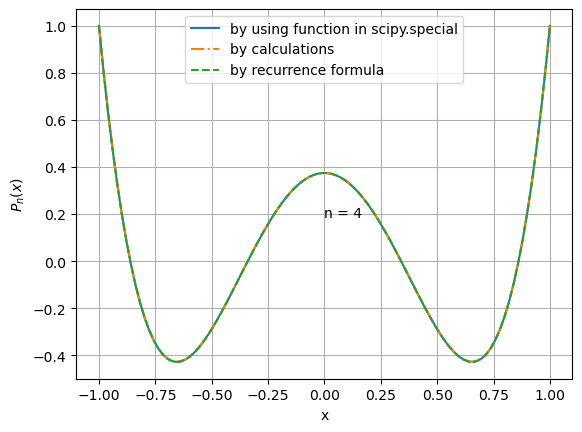

In [26]:
import numpy as np
import matplotlib.pyplot as plt

n = 4   # input degree of the polynomial
x = np.linspace(-1,1,100)
legplot = legendre(n)(x)
Pnplot = [Pn(n,x[i]) for i in range(len(x))]
recPnplot = [recPn(n,x[i]) for i in range(len(x))]

plt.plot(x,legplot,label='by using function in scipy.special')
plt.plot(x,Pnplot,'-.',label='by calculations')
plt.plot(x,recPnplot,'--',label='by recurrence formula')
plt.text((max(x)-abs(min(x)))/2,(max(legplot)-abs(min(legplot)))/3-2e-3,f'n = {n}')
plt.legend()
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.grid()
plt.show()

# Orthogonality of Legendre Polynomials
$$ \int_{-1}^{+1} P_m(x)P_n(x) dx = \frac{2}{2n+1} \delta_{mn} $$

### Short method

In [27]:
import numpy as np
from scipy.special import legendre

def pmpn(m,n):
    pm = legendre(m)
    pn = legendre(n)
    return pm*pn

# Integration by Simpson's 1/3rd Rule
def simp13x(f,a,b,n):
    h = float(b-a)/n
    x0 = np.arange(a+h,b,2*h)
    xe = np.arange(a+2*h,b,2*h)
    val = h/3*(f2(a) + 4*sum(f2(x0)) + 2*sum(f2(xe)) + f2(b))
    return val

# Check Orthogonality for different values of m and n.
m = 3
n = 3

f2 = pmpn(m,n)
intg = simp13x(f2,-1,1,1000)  # integration

if m==n:
    dmn = 1
else:
    dmn = 0
res = (2/(2*n + 1))* dmn  # result
print('m =',m,'n =',n,'\n','RHS =',intg,'\t','LHS =',res)
# compare the values of intg and res

m = 3 n = 3 
 RHS = 0.28571428581562036 	 LHS = 0.2857142857142857


c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:1329: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


### Detailed method

In [28]:
# Simpson's 1/3 rule for integration ( with parameters)
def simp13pr(f, pr, a, b, tol):
    n = 10
    I1 = 0
    while True:
        h = (b-a)/n
        I2 = 0
        for i in range(n+1):
            if i==0 or i==n:
                I2 += f(pr, a+i*h)
            elif i%2==0:
                I2 += 2*f(pr, a+i*h)
            else:
                I2 += 4*f(pr, a+i*h)
        I2 = h*I2/3
        if abs(I2-I1) <= tol:
            break
        else:
            I1 = I2
            n += 10
    return I2

In [29]:
# integrand
def PmPn(pr, x):  # pr[0]=m and pr[1]=n
    return recPn(pr[0], x)*recPn(pr[1], x)

tol = 1e-6
n = 6
m = 4
for i in range(3, n+1):
    I = simp13pr(PmPn, [m,i], -1,1, tol)
    print('(2 X %d +1)/2 P%d P%d = %f' %(i,m,i,I*(2*i+1)/2))

(2 X 3 +1)/2 P4 P3 = 0.000000
(2 X 4 +1)/2 P4 P4 = 1.000008
(2 X 5 +1)/2 P4 P5 = -0.000000
(2 X 6 +1)/2 P4 P6 = 0.000018


# Bessel Functions

**Bessel's Differential Equation:**
$$ x^2y'' + xy' + (x^2-n^2)y = 0 $$

**Solution (Bessel Functions):**
$$ j_n(x) = \sum_{m=0}^{\infty} \frac{(-1)^m}{m! \Gamma(m+n+1)} \left(\frac{x}{2}\right)^{(2m+n)} $$ 

$$ j_{-n}(x) = (-1)^n j_n(x) $$

### from `scipy.special`

In [30]:
from scipy.special import *
jn(3,2)

0.12894324947440208

## By calculations

In [31]:
import numpy as np
from scipy.special import factorial

def besselfn(n,x):
    return sum([(-1)**m*(x/2)**(2*m+n)/(factorial(m)*factorial(m+n))
                for m in range(95)])
besselfn(3,2)

0.1289432494744021

We can get, $$ j_n(x) = \sum_{m=0}^{\infty} t_m $$

Where, $ \hspace{2mm} t_m = - \frac{1}{m(m+n)} (\frac{x}{2})^2 t_{m-1} \hspace{4mm} $ and $ \hspace{4mm} t_0 = \frac{(x/2)^n}{n!} $.

In [32]:
def fact(n):
    fct = 1
    for i in range(2,n+1):
        fct *= i
    return fct

In [33]:
def besfn(nn,x):
    n = abs(nn)
    tol = 1e-5
    t = (x/2)**n/fact(n)  # t_0
    sm = t
    m = 1
    while True:
        sm1 = sm
        t = -(x/2)**2*t/(m*(m+n))
        sm += t
        m += 1
        if abs(sm - sm1) < tol:
            break
    if nn < 0:    # j_-n(x)
        sm = (-1)**n*sm
    return sm

In [34]:
besfn(3,2)

0.1289434523809524

## By recurrence formula

$$ j_{n+1}(x) = \frac{2x}{n} j_n(x) - j_{n-1}(x)  $$
For given $j_0(x)$ and $j_1(x)$.

In [35]:
from scipy.special import *

def recjn(n,x):
    if n == 0:
        return jn(0,x)
    elif n == 1:
        return jn(1,x)
    elif n >= 2:
        jn0, jnmin1 = jn(1,x), jn(0,x)
        for i in range(2,n+1):
            jn1 = 2*(i-1)/x*jn0 - jnmin1
            jnmin1 = jn0
            jn0 = jn1
        return jn1

In [36]:
recjn(3,2)

0.1289432494744024

**Verification**

In [37]:
n1, x1 = 5,-2  # input values
print('by using function in scipy.special\n\t',jn(n1,x1))
print('by calculations\n\t',besfn(n1,x1))
print('by recurrence formula\n\t',recjn(n1,x1))

by using function in scipy.special
	 -0.007039629755871686
by calculations
	 -0.007039517195767195
by recurrence formula
	 -0.007039629755874244


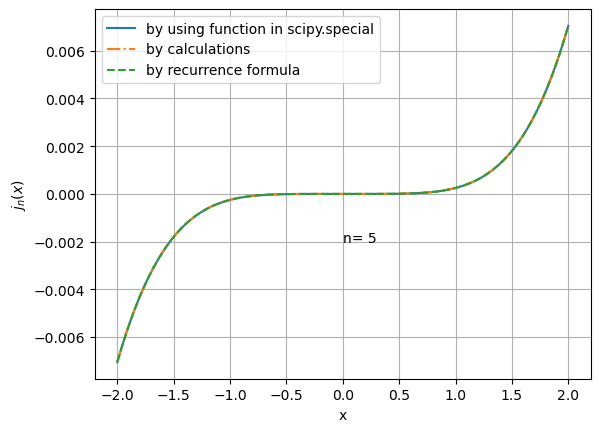

In [38]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2,2,100)
n = 5  # input the value
jn1 = jn(n,x)
besfn1 = [besfn(n,x[i]) for i in range(len(x))]
recjn1 = [recjn(n,x[i]) for i in range(len(x))]

plt.plot(x,jn1,'-',label='by using function in scipy.special')
plt.plot(x,besfn1,'-.',label='by calculations')
plt.plot(x,recjn1,'--',label='by recurrence formula')
plt.text((max(x)-abs(min(x)))/2,(max(jn1)-abs(min(jn1)))/3-2e-3,f'n= {n}')
plt.legend()
plt.xlabel('x')
plt.ylabel('$j_n(x)$')
plt.grid()
plt.show()

# Complex Integration

**19th May, 2023**

The integration is done by Simpson's 1/3 rule.
$$ \int_a^b f(x)dx = \frac{h}{3}[f(a) +4(f(a+h)+f(a+3h)+...) +2(f(a+2h)+f(a+4h)+...) +f(b)] $$

In [39]:
def simp13z(f, pr, a, b, tol):
    n = 10
    I1 = 0
    while True:
        h = (b-a)/n
        I2 = 0
        for i in range(n+1):
            if i==0 or i==n:
                I2 += f(pr, a+i*h)
            elif (i%2)==0:
                I2 += 2*f(pr, a+i*h)
            else:
                I2 += 4*f(pr, a+i*h)
        I2 = (h/3)*I2
        if abs(I2-I1) <= tol:
            break
        else:
            I1 = I2
            n += 10
    return I2

### Example:
$$ \int_0^{\pi+2j} \cos(\frac{z}{2})dz $$

In [40]:
from cmath import *
def f1(pr, z):
    return cos(z/2)  # function
tol = 1e-6
intgsp1 = simp13z(f1, None, 0, pi +2j, tol)
print(intgsp1)

import numpy as np
def f1(pr, z):
    return np.cos(z/2)  # function
tol = 1e-6
intgsp2 = simp13z(f1, None, 0, np.pi +2j, tol)
print(intgsp2)

(3.086161217931016+6.174435784878085e-08j)
(3.086161217931016+6.174435762673625e-08j)


### Example:
$$ \int_0^j \frac{z^2 +1}{z +1}dz $$

In [41]:
import numpy as np
def f2(pr, z):
    return (z**2 +1)/(z +1) # function
tol = 1e-6
intgsp2 = simp13z(f2, None, 0, 1j, tol)
print(intgsp2)

(0.1931472836593496+0.5707963267676798j)


## Contour Integration

We need to evaluate $\oint_c f(z)dz $ from $z=z_0$ to $z=z_1$ along the curve $c$ and $z=c(t)$.

We can get the integration as, $(z = c(t) = x(t) +jy(t))$
$$ \int_{t_0}^{t_1} f(x(t)+jy(t)) (x'(t)+jy'(t)) dt = \int_{t_0}^{t_1} F(t)dt $$

### Differentiation (3 points):
$$ \frac{df}{dx} = \frac{f(x+h) -f(x-h)}{2h} $$

In [42]:

def dfdz3(f, pr, z, tol):
    h = 0.1
    ch = complex(h,h)
    dfdz1 = (f(pr, z+ch) - f(pr, z-ch))/(2*ch)
    while True:
        h = h/2
        ch = complex(h,h)
        dfdz2 = (f(pr, z+ch) - f(pr, z-ch))/(2*ch)
        if abs(dfdz2 -dfdz1) <= tol:
            break
        else:
            dfdz1 = dfdz2
    return dfdz2

### Formation of integrand and integration:

In [43]:
def fzdz(fnpr, t):
    f, prf, c, prc, tol = fnpr
    z = c(prc, t)
    Ft = f(prf, z)* dfdz3(c, prc, t, tol)
    return Ft

def simp13cont(f, prf, c, prc, t0, t1, tol):
    fnpr = [f, prf, c, prc, tol]
    contintg = simp13z(fzdz, fnpr, t0, t1, tol)
    return contintg

### Examples

**Example 1:** $f(z)= \pi exp(\pi \bar{z})$ and $c$ is the boundary of square with vertices $0, 1, 1+j, j$ in anticlockwise direction.

**Solution:** We have the paths,
1. $c_1: (z_0 = 0, z_1 = 1)$.
2. $c_2: (z_0 = 1, z_1 = 1+j)$.
3. $c_3: (z_0 = 1+j, z_1 = j)$.
4. $c_4: (z_0 = j, z_1 = 0)$.

In [44]:
import numpy as np
def f(prf, z):
    return np.pi*np.exp(np.pi*z.conjugate()) # input the function

def c1(prc, z):  # curve (path) 1
    return z
def c2(prc, z):  # curve (path) 2
    return z
def c3(prc, z):  # curve (path) 3
    return z
def c4(prc, z):  # curve (path) 4
    return z

In [45]:
tol = 1e-6
prf, prc = None, None

intg1 = simp13cont(f, prf, c1, prc, 0, 1, tol)
print('I_c1 =', intg1)
intg2 = simp13cont(f, prf, c2, prc, 1, 1+1j, tol)
print('I_c2 =', intg2)
intg3 = simp13cont(f, prf, c3, prc, 1+1j, 1j, tol)
print('I_c3 =', intg3)
intg4 = simp13cont(f, prf, c4, prc, 1j, 0, tol)
print('I_c4 =', intg4)

intg = intg1 + intg2 + intg3 + intg4
print('result I_c =', intg)

I_c1 = (22.14069355699097-5.899692905713894e-15j)
I_c2 = (46.281386308945336-1.827109891954543e-14j)
I_c3 = (22.14069355699098+6.033653069004802e-15j)
I_c4 = (-2.000000423093183+1.4802973661668754e-17j)
result I_c = (88.56277299983411-1.8122335782592855e-14j)


**Example 2:** $f(z)= \frac{1}{(z-z_0)^n}, \hspace{2mm} (n = 2,3,4,...)$; $c(\theta) = Re^{j\theta}$ and $z_0 = \frac{R}{2} exp(\frac{j\pi}{4}), (R=1) $.

**Solution:**

In [46]:
import numpy as np
def f(prf, z):
    z0, n = prf
    return 1/(z-z0)**n # input the function

def c(prc, th):
    R = prc
    return R*np.exp(th*1j)  # input the curve

In [47]:
tol = 1e-6
R = 1
z0 = (R/2)* np.exp(1j*np.pi/4)
for n in range(2,5):
    intg = simp13cont(f, [z0,n], c, R, 0, 2*np.pi, tol)
    print('n = %d, I =' %(n), intg)

n = 2, I = (4.266343353926582e-09+1.391659530705444e-13j)
n = 3, I = (-5.943228934898735e-09+1.241528591044285e-13j)
n = 4, I = (6.757301247986022e-09-4.962590971092578e-14j)


**Example 3:** $f(z) = \sqrt{z}$ and $c$ is the boundary broken into 3 parts $c_1, c_2, c_3$ in anticlockwise direction.
1. $c_1: z = re^{0}; (0 \leq r \leq 1)$.
2. $c_2: z = 1e^{j\theta}; (0 \leq \theta \leq \pi)$.
3. $-c_3: z = re^{0}; (0 \leq r \leq 1)$.

**Solution:** 

In [48]:
import numpy as np
def f(prf, z):
    return z**0.5 # input the function

def c1(prc, r):  # curve (path) 1
    return r
def c2(prc, th):  # curve (path) 2
    return np.exp(1j*th)
def c3(prc, r):  # curve (path) 3
    return -r

In [49]:
tol = 1e-6
intg1 = simp13cont(f, None, c1, None, 0, 1, tol)
intg2 = simp13cont(f, None, c2, None, 0, np.pi, tol)
intg3 = simp13cont(f, None, c3, None, 1, 0, tol)
intg = intg1 +intg2 +intg3
print(intg)

(-1.7539275942214797e-05-1.7268008757120867e-05j)


# Discrete Fourier Transform (DFT)

Discrete Fourier Transform (DFT):
$$ F_m = \sum_{n=0}^{N-1} f_n e^{-2\pi jmn/ N} \quad ; (m=0,1,2,3,...,N-1) $$
Discrete Inverse Fourier Transform (DIFT):
$$ f_n = \sum_{m=0}^{N-1} F_m e^{2\pi jmn/ N} \quad ; (n=0,1,2,3,...,N-1)$$

In [50]:
import numpy as np

Defining **`dft`** function for both DFT and DIFT:

In [51]:
def dft(ft, isg):
    N = len(ft)
    Fs = []
    for m in range(N):
        Fk = 0
        for n in range(N):
            Fk += ft[n] * np.exp(-isg*2*np.pi*1j*m*n/N)
        if isg == 1:
            Fs.append(Fk)
        elif isg == -1:
            Fs.append(Fk/N)
    return Fs

Defining **`cntdft`** function for getting centered or two-sided transform instead of one-sided transform:

In [52]:
def cntdft(ft, isg):
    N = len(ft)
    a = (N-1)/2
    exft = [ft[i]*np.exp(2*np.pi*1j*a*i/N) for i in range(N)] # pre-transform
    Fs = dft(exft, isg)
    Fs = [Fs[i]*np.exp(2*np.pi*1j*a*(i-a)/N) for i in range(N)] # post-transform
    return Fs

Defining **`fourspc`** function for Fourier space co-ordinates:

$$\delta x \delta k = \frac{2\pi}{N} \,; \quad k_{mx} = \left(1-\frac{1}{N} \right)\frac{\pi}{\delta x} $$

In [53]:
def fourspc(x):
    N = len(x)
    dx = x[1]-x[0]
    dk = 2*np.pi/(N*dx)
    kmx = (1 -1/N)*np.pi/dx
    k = [-kmx + i*dk for i in range(N)]
    return k

## Example

### Example 1
$$ U(t) = 1+t \quad ;(-1 \leq t < 0) $$
$$ = 1-t \quad ; (0 \leq t < 1) $$
$$ =0 \quad otherwise $$

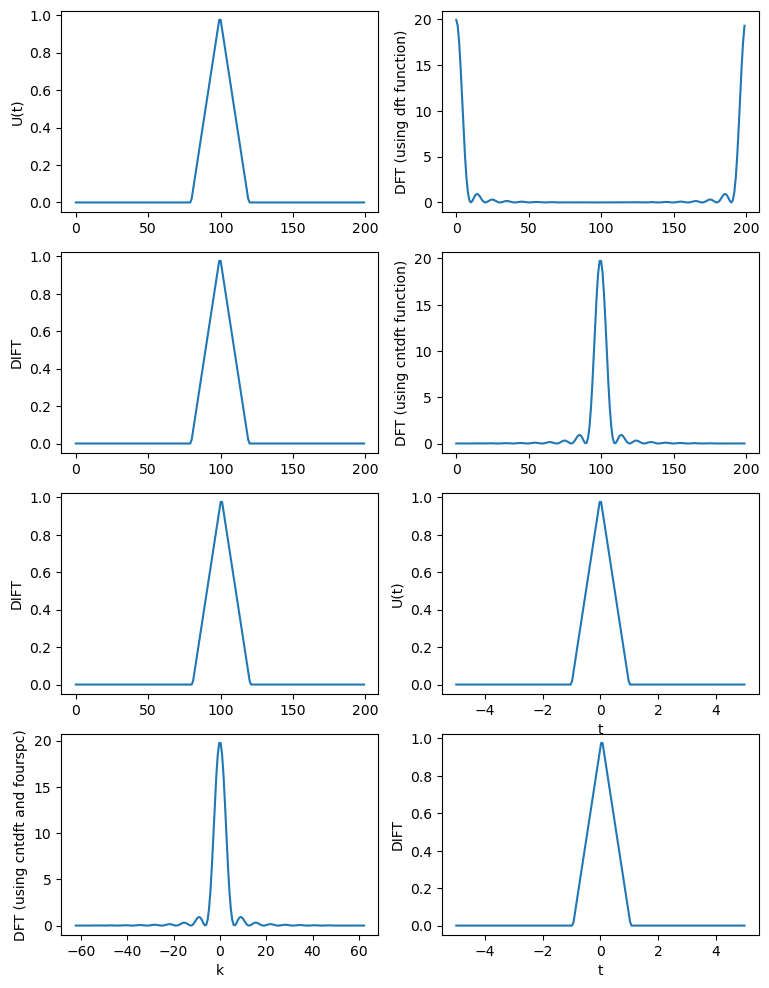

In [54]:
import matplotlib.pyplot as plt

def u(t):
    if -1<=t<0:
        ut = 1+t
    elif 0<=t<1:
        ut = 1-t
    else:
        ut = 0
    return ut

tmn, tmx = -5, 5  # time bounds
N = 200    # no. of samples
dt = (tmx-tmn)/(N-1)

t = [tmn + i*dt for i in range(N)] # time samples
k = fourspc(t)
ut = [u(tt) for tt in t] # discrete signal

Fs1 = dft(ut, 1) # DFT
IFs1 = dft(Fs1, -1) # DIFT
Fs2 = cntdft(ut, 1)
IFs2 = cntdft(Fs2, -1)

plt.figure(figsize=(9,12))
plt.subplot(4,2,1)
plt.plot(ut)
plt.ylabel('U(t)')

plt.subplot(4,2,2)
plt.plot(np.abs(Fs1))
plt.ylabel('DFT (using dft function)')
plt.subplot(4,2,3)
plt.plot(np.abs(IFs1))
plt.ylabel('DIFT')

plt.subplot(4,2,4)
plt.plot(np.abs(Fs2))
plt.ylabel('DFT (using cntdft function)')
plt.subplot(4,2,5)
plt.plot(np.abs(IFs2))
plt.ylabel('DIFT')

plt.subplot(4,2,6)
plt.plot(t, ut)
plt.xlabel('t')
plt.ylabel('U(t)')
plt.subplot(4,2,7)
plt.plot(k, np.abs(Fs2))
plt.xlabel('k')
plt.ylabel('DFT (using cntdft and fourspc)')
plt.subplot(4,2,8)
plt.plot(t, np.abs(IFs2))
plt.xlabel('t')
plt.ylabel('DIFT')
plt.show()

### Example 2
Fourier transform of a signal which is superpositions of a number of signals with different frequencies and amplitudes.

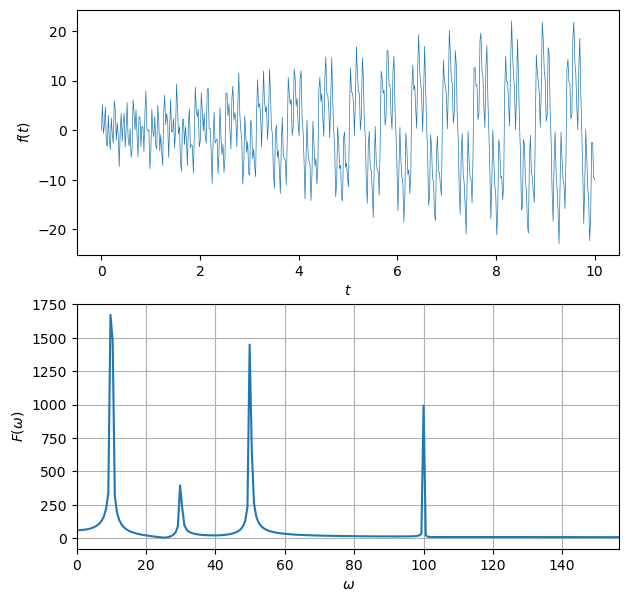

In [55]:
def f(t):
    freqs = [10, 30, 50, 100] # frequencies
    amps = [t**2*np.exp(-t/5), 2, 3*t**0.5, 4]  # amplitudes
    phis = [0, 0, 0, 0]  # initial phases
    ft = 0
    for i in range(len(freqs)):
        ft += amps[i]*np.sin(freqs[i]*t +phis[i])
    return ft

N = 500
tmn, tmx = 0, 10
dt = (tmx-tmn)/(N-1)
t = [tmn+i*dt for i in range(N)]
w = fourspc(t)
ft = [f(tt) for tt in t]
Fw = cntdft(ft, 1)

plt.figure(figsize=(7, 7))
plt.subplot(211)
plt.plot(t, ft, lw=0.5)
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.subplot(212)
plt.plot(w, np.abs(Fw))
plt.xlim(0, np.max(w))
plt.xlabel('$\omega$')
plt.ylabel('$F(\omega)$')
plt.grid()
plt.show()

# Fast Fourier Transform (FFT)

In [56]:
import numpy as np

In [57]:
def fft2(ft, isg):
    N = len(ft)
    if N==1:
        F = ft # dft is length 1
    else:
        # divide the dft into 2 using radix-2 Cooley-Tukey
        Am = fft2(ft[::2], isg)
        Bm = fft2(ft[1::2], isg)
        # combine with appropriate weights
        m = np.arange(N/2)
        W = np.exp(-isg*2*np.pi*1j*m/N)
        F = np.concatenate([Am + W*Bm, Am - W*Bm])
    return F    

In [58]:
def fft(ft, isg):
    N = len(ft)
    if isg==1:
        return fft2(ft, isg)
    elif isg==-1:
        return fft2(ft, isg)/N

In [59]:
def cntfft(ft, isg):
    N = len(ft)
    a = (N-1)/2
    exft = [ft[i]*np.exp(2*np.pi*1j*a*i/N) for i in range(N)] # pre-transform
    Fs = fft(exft, isg)
    Fs = [Fs[i]*np.exp(2*np.pi*1j*a*(i-a)/N) for i in range(N)] # post-transform
    return Fs

### Example 1:
Real part of Gaussian function:
$$ f(x) = e^{-\dfrac{x^2}{\sigma^2}} \cos \omega_0x $$

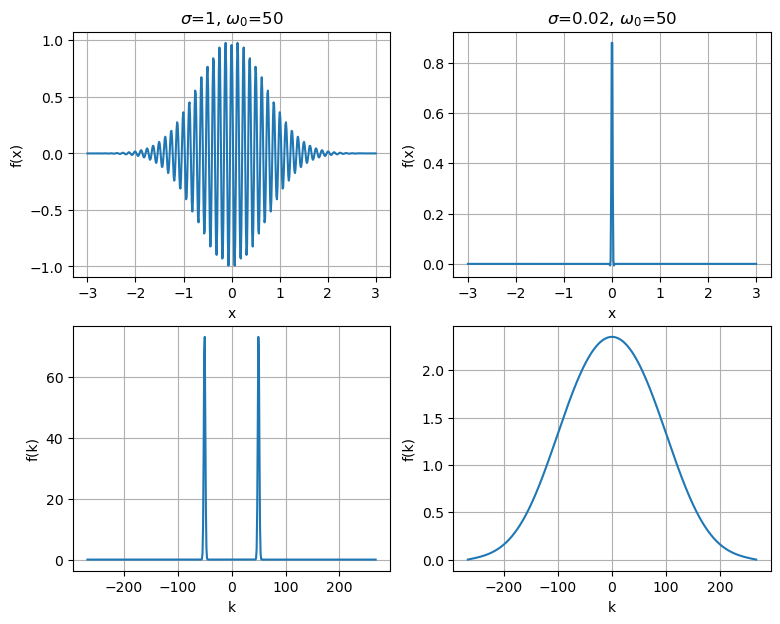

In [60]:
def f(pr, x):
    sig, w0 = pr
    return np.exp(-x**2/sig**2)*np.cos(w0*x)

N = 512  # N should be in the form 2**n
xmn, xmx = -3, 3
dt = (xmx-xmn)/(N-1)
x = [xmn+i*dt for i in range(N)]
k = fourspc(x)

sig1, w01 = 1, 50  # parameters
pr1 = [sig1, w01]
fx1 = [f(pr1, xx) for xx in x]
fk1 = cntfft(fx1, 1)
sig2, w02 = 0.02, 50  # parameters
pr2 = [sig2, w02]
fx2 = [f(pr2, xx) for xx in x]
fk2 = cntfft(fx2, 1)

plt.figure(figsize=(9, 7))
plt.subplot(221)
plt.title(f'$\sigma$={sig1}, $\omega_0$={w01}')
plt.plot(x, fx1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.subplot(223)
plt.plot(k, np.abs(fk1))
plt.xlabel('k')
plt.ylabel('f(k)')
plt.grid()

plt.subplot(222)
plt.title(f'$\sigma$={sig2}, $\omega_0$={w02}')
plt.plot(x, fx2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.subplot(224)
plt.plot(k, np.abs(fk2))
plt.xlabel('k')
plt.ylabel('f(k)')
plt.grid()
plt.show()

## Question-10:
Find FFT of $e^{-x}$.

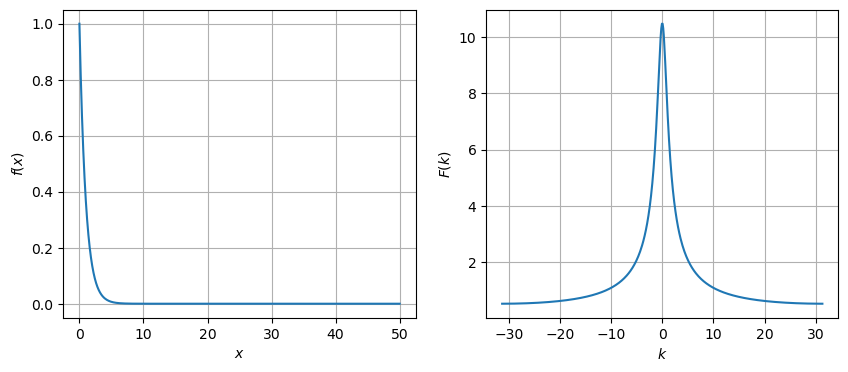

In [61]:
def f(x):
    return np.exp(-x)

N = 500
xmn, xmx = 0, 50
dx = (xmx-xmn)/(N-1)
x = [xmn+i*dx for i in range(N)]
k = fourspc(x)
fx = [f(xx) for xx in x]
Fk = cntdft(fx, 1)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(x, fx)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.subplot(122)
plt.plot(k, np.abs(Fk))
# plt.xlim(0, np.max(k))
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.grid()
plt.show()

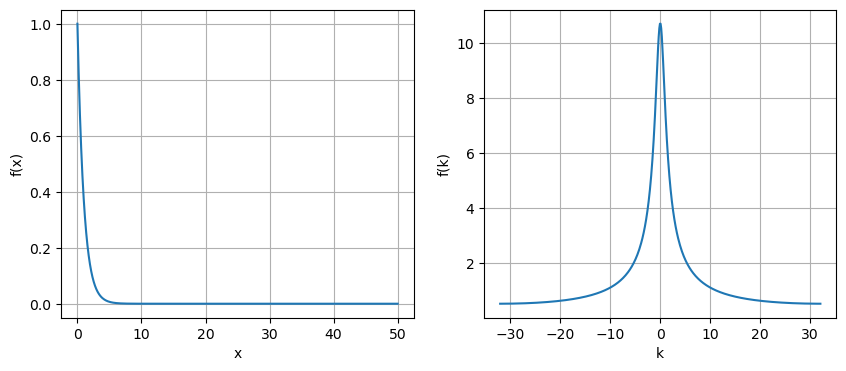

In [62]:
def f(x):
    return np.exp(-x)
N = 512  # N should be in the form 2**n
xmn, xmx = 0, 50
dx = (xmx-xmn)/(N-1)
x = [xmn+i*dx for i in range(N)]
k = fourspc(x)

fx = [f(xx) for xx in x]
fk = cntfft(fx, 1)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(x, fx)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.subplot(122)
plt.plot(k, np.abs(fk))
plt.xlabel('k')
plt.ylabel('f(k)')
plt.grid()
plt.show()

# Other Topics

## Dirac Delta Function

Gaussian Function, $$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}} $$

Dirac Delta Function, $$ \delta(x-x_0) = \infty ; \quad x=x_0 $$ 
$$ = 0; \quad  x \neq x_0 $$

We can obtain Dirac Delta function from Gaussian function for some certain range of values of $\mu$ and $\sigma$.

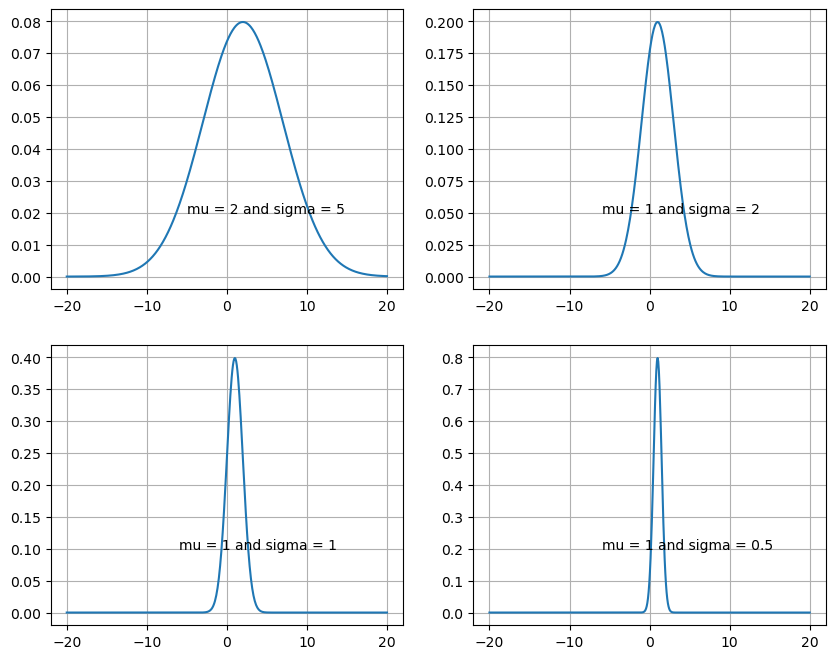

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

f = lambda x: (1/(sigma*(2*np.pi)**0.5))*np.exp(-(x-mu)**2/(2*sigma**2))
x1 = np.linspace(-20,20,500)

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax1, ax2, ax3, ax4 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]

mu, sigma = 2, 5            # input values
ax1.plot(x1,f(x1))
ax1.text(mu-7, max(f(x1))/4, f'mu = {mu} and sigma = {sigma}')
ar1 = quad(f,-np.inf,np.inf)[0]
# ax1.text(mu-15, max(f(x1))/2, f'area under curve = {ar1}')
ax1.grid()

mu, sigma = 1, 2            # input values
ax2.plot(x1,f(x1))
ax2.text(mu-7, max(f(x1))/4, f'mu = {mu} and sigma = {sigma}')
ar2 = quad(f,-np.inf,np.inf)[0]
# ax2.text(mu-15, max(f(x1))/2, f'area under curve = {ar2}')
ax2.grid()

mu, sigma = 1, 1            # input values
ax3.plot(x1,f(x1))
ax3.text(mu-7, max(f(x1))/4, f'mu = {mu} and sigma = {sigma}')
ar3 = quad(f,-np.inf,np.inf)[0]
# ax3.text(mu-15, max(f(x1))/2, f'area under curve = {ar3}')
ax3.grid()

mu, sigma = 1, 0.5            # input values
ax4.plot(x1,f(x1))
ax4.text(mu-7, max(f(x1))/4, f'mu = {mu} and sigma = {sigma}')
ar4 = quad(f,-np.inf,np.inf)[0]
# ax4.text(mu-15, max(f(x1))/2, f'area under curve = {ar4}')
ax4.grid()
plt.show()
# change values of mu and sigma to adjust the graphs

## Question-2
$ \frac{1}{\sqrt{2 \pi \sigma^2}} \int_0^\infty e^{-\frac{(2-x)^2}{2 \sigma^2}}(x+3) dx $; for $\sigma = 1,0.1,0.01$ and show that the value tends to 5.

In [64]:
import numpy as np
import scipy as sp
from scipy.integrate import simps

sigmas = [1, 0.1, 0.01]  # change the value
for sigma in sigmas:
    xmax = 100  # set the upper limit
    x = np.linspace(0, xmax, int(xmax/sigma))  # set no. of points
    f1 = (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(2-x)**2/(2*sigma**2))*(x+3)
    f2 = simps(f1,x)
    print(f'sigma = {sigma} \t value = {f2} \t error = {5-f2}')

sigma = 1 	 value = 4.978300045718836 	 error = 0.021699954281164224
sigma = 0.1 	 value = 5.000000028048047 	 error = -2.8048047440165647e-08
sigma = 0.01 	 value = 5.000000026689211 	 error = -2.668921084136855e-08


## Question-3
Program to sum: $$ \sum_{n=1}^{\infty} (0.2)^n $$

In [65]:
nmax = 1000   # the upper limit of sum
a = 0
for i in range(1,nmax+1):
    a = a + 0.2**i  

print(f'Sum of the series = {a}. (Using {nmax} no. of terms)')

Sum of the series = 0.2500000000000001. (Using 1000 no. of terms)


## Question-7
Sine function from Bessel's function at $N$ points:

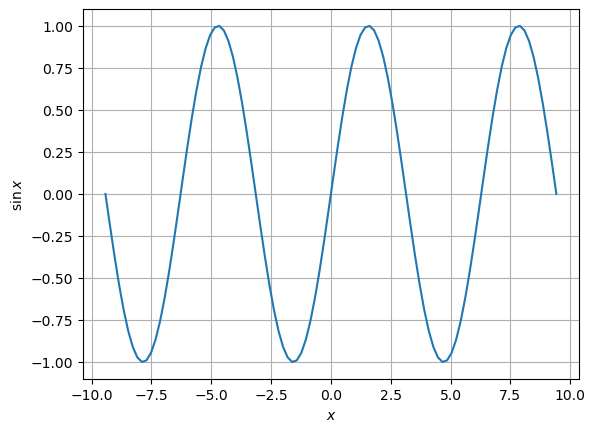

In [66]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3*np.pi, 3*np.pi, 100)
a = 1.0
n = 100
sum = 1.0
for i in range(1,n+1):
    a = (-1)*(x**2)*a/(2*i*(2*i+1))
    sum += a
sum = sum*x

plt.plot(x,sum)
plt.xlabel('$x$')
plt.ylabel('$\sin x$')
plt.grid()
plt.show()

Computation of $\sin(6)$

In [67]:
x = 6
a = 1.0
nmax = 100
sum = 1.0
for n in range(1,nmax+1):
    a = (-1)*(x**2)*a/(2*n*(2*n+1)) 
    # a is the (n+1)th term in lhs nth term in rhs
    sum += a
sum = sum*x

print(f'Value of sin6 by using recurrence formula: {sum}. ({nmax} no. of terms used)')
print(f'Value of sin6 by using numpy function: {np.sin(6)}')

Value of sin6 by using recurrence formula: -0.27941549819892436. (100 no. of terms used)
Value of sin6 by using numpy function: -0.27941549819892586


$$ \sin(x) = 2 \sum_{n=0}^{\infty} J_{2n+1}(x) $$

In [68]:
import scipy.special as sps

x = 6    # input
n = 20
s = 0
for i in range(n):
    s += ((-1)**i)*(sps.jn(2*i+1, x))
s = 2*s
print(s)

-0.27941549819892514


## Question-8: n-th Root of Unity

$$ x^n = 1 = e^{i(2\pi k)} $$

$$ x = e^{i(\frac{2 \pi k}{n})} = \cos\left(\frac{2 \pi k}{n}\right) + i \sin\left(\frac{2 \pi k}{n}\right) $$

In [69]:
import numpy as np

def croot(k,n):
    if n<=0:
        return None
    return np.exp(1j*(2*np.pi*k)/n)
n = 4   # put an integer
for k in range(n):
    print(croot(k,n))

(1+0j)
(6.123233995736766e-17+1j)
(-1+1.2246467991473532e-16j)
(-1.8369701987210297e-16-1j)


## Question-9: Square Root of Complex Numbers

$$ \sqrt{x+iy} = \sqrt{r} \cos(\theta/2) + i \sqrt{r} \sin(\theta/2) = \sqrt{r} e^{i \theta /2} $$
where $ r = \sqrt{x^2+y^2} $ and $ \tan(\theta) = \frac{y}{x} $

In [70]:
import numpy as np

# Values of x and y
x, y = -5, 12

r = (x**2 + y**2)**0.5
th = np.arctan(y/x)
root = r**0.5 * np.exp(1j*th/2)
root

(2.9999999999999996-2j)